In [129]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

What is Customer Segmentation ? <br/>
It is a process of segregating customers based on various condition that can help the company focus on targeted marketing, product recommendations and a way to engage specific segment of the customer. <br/>

In [130]:
data = pd.read_csv('../Dataset/Customer-Segmentation-Data.csv')

## Exploratory Data Analysis

In [131]:
data.shape

(35116, 8)

In [132]:
data.head(25)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583.0,France
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583.0,France
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583.0,France
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583.0,France
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583.0,France


In [133]:
data.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

We need to segregate the customers, for that purpose we need to to identify customers as unique individual. The presence of NaN values doesnt provide the identity of the customer and hence the record is meaningless.

In [134]:
data.dropna(inplace=True)

In [135]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [136]:
data['CustomerID'] = data['CustomerID'].apply(int)

In [137]:
data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,33698.000000,33698.000000,33698.000000,33698.000000
mean,559921.120779,14.797110,4.480351,12793.819188
std,12718.848027,31.690705,47.179203,828.171434
min,536370.000000,1.000000,0.040000,12347.000000
25%,548374.500000,5.000000,1.250000,12473.000000
50%,561093.000000,10.000000,1.950000,12597.000000
75%,570672.000000,12.000000,3.750000,12708.000000
max,581587.000000,2040.000000,4161.060000,17844.000000


<Axes: xlabel='count', ylabel='Country'>

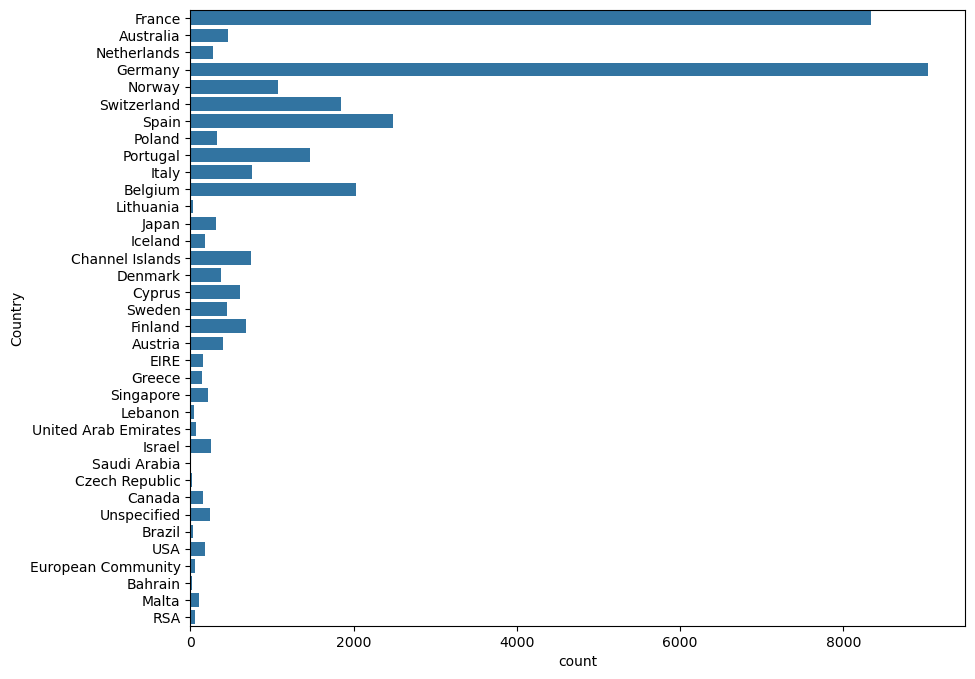

In [138]:
plt.figure(figsize=(10,8))
sns.countplot(y='Country', data=data)

In [139]:
data['Sales'] = data.Quantity*data.UnitPrice

In [140]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.00
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.00
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.00
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.20
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.60
...,...,...,...,...,...,...,...,...,...
35111,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680,France,10.20
35112,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680,France,12.60
35113,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680,France,16.60
35114,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680,France,16.60


In [141]:
total_sales_by_country = data.groupby(['Country']).Sales.agg({'sum'})

Text(0.5, 1.0, 'Total Sales By Country')

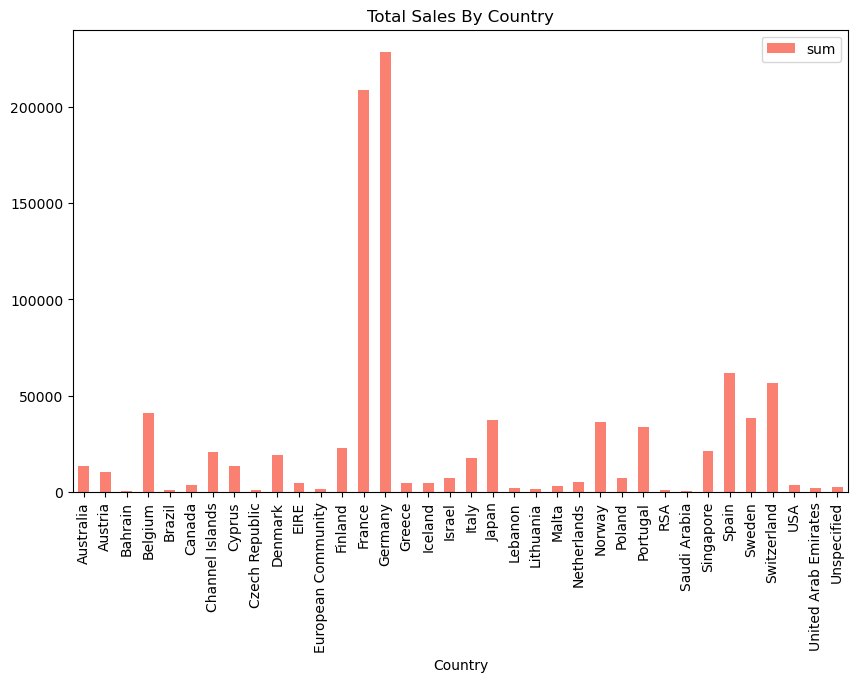

In [142]:
total_sales_by_country.plot(kind='bar', figsize=(10,6),color='salmon')
plt.title('Total Sales By Country')

In [143]:
len(data['CustomerID'].unique()) 

414

In [144]:
len(data['StockCode'].unique())

2574

In [145]:
most_sold_items = pd.DataFrame({})
most_sold_items

""


In [146]:
most_sold_items['Counts'] = data['StockCode'].value_counts()

In [147]:
most_sold_items

,Counts
StockCode,
POST,1055
22326,271
22423,222
22554,197
22556,179
...,...
20897,1
20794,1
23136,1


In [148]:
most_sold_items_gteq_50 = most_sold_items[most_sold_items['Counts'] >= 50]

Text(0.5, 1.0, 'Most Sold Items')

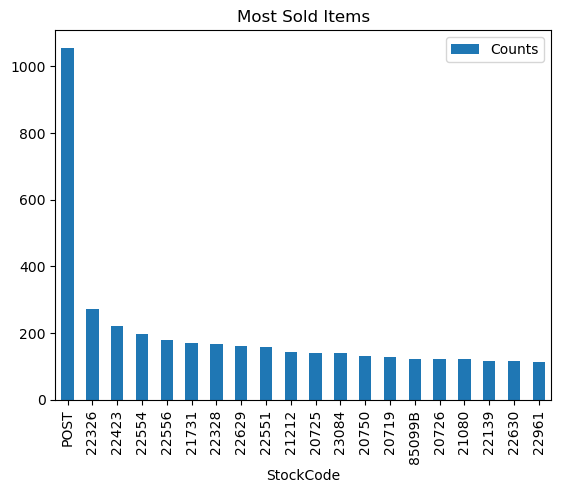

In [149]:
most_sold_items_gteq_50.head(20).plot(kind='bar')
plt.title('Most Sold Items')

In [150]:
# Most revenue generating items
groupby = data.groupby(['StockCode'])

In [151]:
most_revenue_generating_items = pd.DataFrame({
    'Total_Sales': groupby['Sales'].sum(),
    'Total_Counts': groupby['Sales'].count()
})

In [152]:
most_revenue_generating_items_20 = most_revenue_generating_items.sort_values(by=['Total_Counts'], ascending=False).head(20)

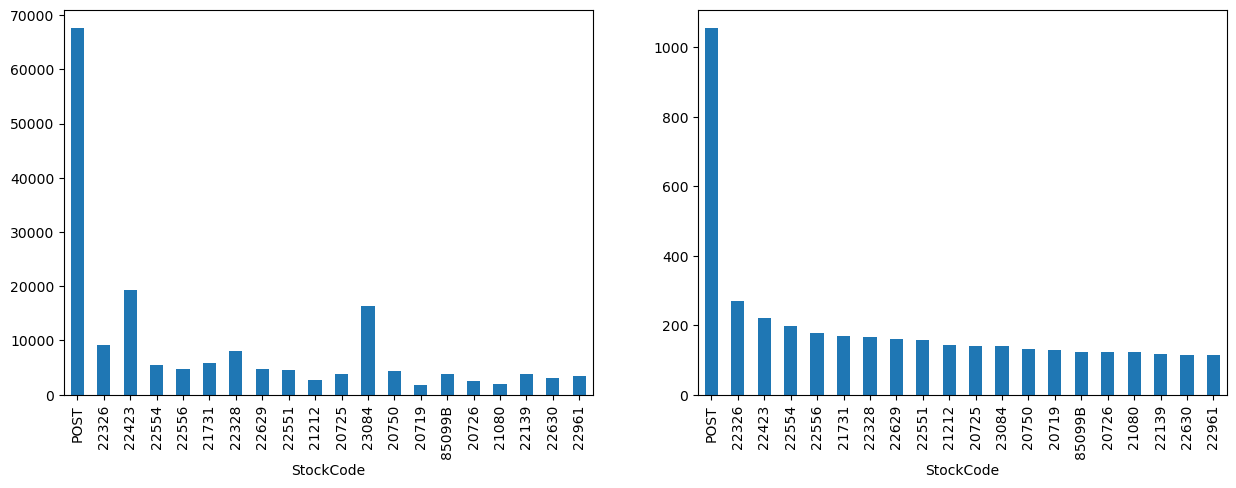

In [153]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
for ax,i in zip(axes.flatten(),['Total_Sales','Total_Counts']):
    most_revenue_generating_items_20[i].head(20).plot(kind='bar',ax=ax)

In [154]:
invoice_data = pd.DataFrame(data.groupby(['CustomerID']).InvoiceNo.agg(Count='nunique'))
invoice_data

,Count
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8
...,...
17444,3
17508,1
17828,4


In [155]:
# Aggregate product data
product_data = data.groupby('CustomerID').StockCode.agg(total_product='count',total_unique_product='nunique')
product_data

,total_product,total_unique_product
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59
...,...,...
17444,135,132
17508,22,22
17828,67,54


In [156]:
# Aggregate product data
sales_data = data.groupby('CustomerID').Sales.agg(total_product_sales='sum',average_product_value='mean')
sales_data

,total_product_sales,average_product_value
CustomerID,,
12347,4310.00,23.681319
12348,1797.24,57.975484
12349,1757.55,24.076027
12350,334.40,19.670588
12352,2506.04,29.482824
...,...,...
17444,2940.04,21.778074
17508,387.31,17.605000
17828,1820.09,27.165522


In [157]:
cart_data = data.groupby(['CustomerID','InvoiceNo']).Sales.agg(cart_value='sum')
cart_data

cart_value
CustomerID InvoiceNo            
12347      537626         711.79
           542237         475.39
           549222         636.25
           556201         382.52
           562032         584.91
...                          ...
17828      557668          30.00
           563936         213.50
           576897         743.43
17829      543911         889.24
17844      564428          51.56

[1536 rows x 1 columns]

In [158]:
cart_data.reset_index(inplace=True)

In [159]:
cart_data

,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91
...,...,...,...
1531,17828,557668,30.00
1532,17828,563936,213.50
1533,17828,576897,743.43
1534,17829,543911,889.24


In [160]:
agg_cart_data = cart_data.groupby(['CustomerID']).cart_value.agg(avg_cart_value='mean',min_cart_value='min',max_cart_value='max')
agg_cart_data

,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,
12347,615.714286,224.82,1294.32
12348,449.310000,227.44,892.80
12349,1757.550000,1757.55,1757.55
12350,334.400000,334.40,334.40
12352,313.255000,120.33,840.30
...,...,...,...
17444,980.013333,550.94,1217.64
17508,387.310000,387.31,387.31
17828,455.022500,30.00,833.16


In [161]:
customer_df = invoice_data.join([product_data, sales_data, agg_cart_data])
customer_df

,Count,total_product,total_unique_product,total_product_sales,average_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30
...,...,...,...,...,...,...,...,...
17444,3,135,132,2940.04,21.778074,980.013333,550.94,1217.64
17508,1,22,22,387.31,17.605000,387.310000,387.31,387.31
17828,4,67,54,1820.09,27.165522,455.022500,30.00,833.16


In [162]:
from sklearn.preprocessing import OneHotEncoder

In [163]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(data[['StockCode']])

# Convert the result to a pandas DataFrame for better readability
encoded_df = pd.DataFrame(np.array(encoded_data), columns=encoder.get_feature_names_out())
encoded_df

,StockCode_10002,StockCode_10120,StockCode_10125,StockCode_10133,StockCode_10135,StockCode_11001,StockCode_15034,StockCode_15036,StockCode_15039,StockCode_15044A,...,StockCode_90192,StockCode_90201A,StockCode_90201B,StockCode_90201C,StockCode_90201D,StockCode_90202D,StockCode_90204,StockCode_C2,StockCode_M,StockCode_POST
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
encoded_df['CustomerID'] = data['CustomerID']

In [165]:
encoded_df

,StockCode_10002,StockCode_10120,StockCode_10125,StockCode_10133,StockCode_10135,StockCode_11001,StockCode_15034,StockCode_15036,StockCode_15039,StockCode_15044A,...,StockCode_90201A,StockCode_90201B,StockCode_90201C,StockCode_90201D,StockCode_90202D,StockCode_90204,StockCode_C2,StockCode_M,StockCode_POST,CustomerID
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12583.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12583.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12583.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12583.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17097.0
33694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17097.0
33695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17097.0
33696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17097.0


In [166]:
items_data = encoded_df.groupby('CustomerID').sum()
items_data

,StockCode_10002,StockCode_10120,StockCode_10125,StockCode_10133,StockCode_10135,StockCode_11001,StockCode_15034,StockCode_15036,StockCode_15039,StockCode_15044A,...,StockCode_90192,StockCode_90201A,StockCode_90201B,StockCode_90201C,StockCode_90201D,StockCode_90202D,StockCode_90204,StockCode_C2,StockCode_M,StockCode_POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17444.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
17508.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [167]:
items_data.sum()

StockCode_10002       12.0
StockCode_10120        1.0
StockCode_10125       13.0
StockCode_10133        4.0
StockCode_10135        4.0
                     ...  
StockCode_90202D       0.0
StockCode_90204        1.0
StockCode_C2           5.0
StockCode_M           34.0
StockCode_POST      1010.0
Length: 2574, dtype: float64

In [168]:
top_120_items = items_data.sum().sort_values().tail(120).index
top_120_items

Index(['StockCode_23243', 'StockCode_21240', 'StockCode_23389',
       'StockCode_85014B', 'StockCode_22966', 'StockCode_22847',
       'StockCode_23255', 'StockCode_21558', 'StockCode_22558',
       'StockCode_23292',
       ...
       'StockCode_23084', 'StockCode_22551', 'StockCode_22629',
       'StockCode_22328', 'StockCode_21731', 'StockCode_22556',
       'StockCode_22554', 'StockCode_22423', 'StockCode_22326',
       'StockCode_POST'],
      dtype='object', length=120)

In [169]:
top_120_items_data = items_data[top_120_items]
top_120_items_data

,StockCode_23243,StockCode_21240,StockCode_23389,StockCode_85014B,StockCode_22966,StockCode_22847,StockCode_23255,StockCode_21558,StockCode_22558,StockCode_23292,...,StockCode_23084,StockCode_22551,StockCode_22629,StockCode_22328,StockCode_21731,StockCode_22556,StockCode_22554,StockCode_22423,StockCode_22326,StockCode_POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,7.0
12348.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,2.0,1.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,2.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12352.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17444.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,6.0
17508.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0


In [170]:
import datetime

In [171]:
reference_date = data['InvoiceDate'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%y %H:%M')).max()

In [172]:
reference_date

Timestamp('2011-12-09 12:50:00')

In [173]:
data['Dateobject'] = data['InvoiceDate'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%y %H:%M'))

In [174]:
data['Days-Since-Last-Purchase'] = (reference_date - data.Dateobject).apply(lambda x : x.days)

In [175]:
customer_history_data=data[['CustomerID', 'Days-Since-Last-Purchase']].groupby('CustomerID').min()

In [176]:
customer_history_data.rename(columns={'Days-Since-Last-Purchase':'Recency'},inplace=True)

In [177]:
customer_frequency_data = data[['CustomerID', 'InvoiceNo']].groupby(['CustomerID','InvoiceNo']).count().reset_index().groupby(['CustomerID']).count()

In [178]:
customer_frequency_data.rename(columns={'InvoiceNo':'Frequency'}, inplace=True)

In [179]:
customer_sales_data = data[['CustomerID','Sales']].groupby(['CustomerID']).sum()
customer_sales_data.rename(columns={'Sales':'Monetary'}, inplace=True)

In [188]:
RFM_data = customer_history_data.join(customer_frequency_data).join(customer_sales_data)
RFM_data

,Recency,Frequency,Monetary
CustomerID,,,
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40
12352,35,8,2506.04
...,...,...,...
17444,147,3,2940.04
17508,280,1,387.31
17828,22,4,1820.09


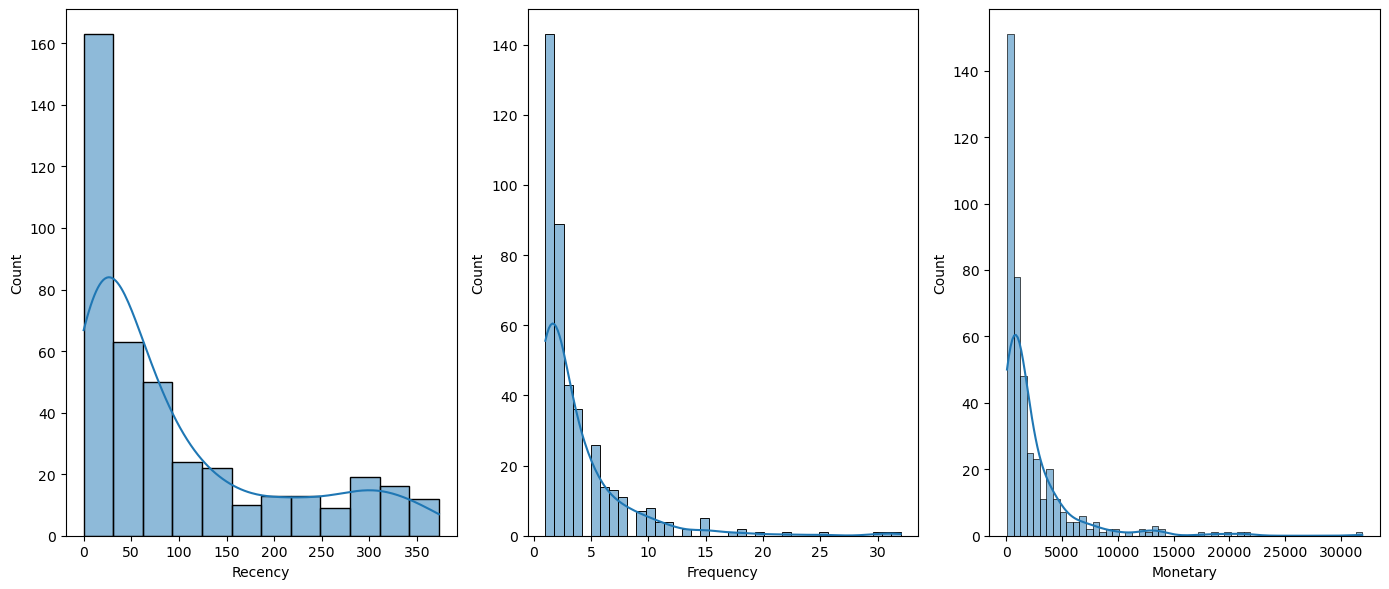

In [189]:
fig, axes = plt.subplots(1,3, figsize=(14,6))
for ax, val in zip([0,1,2],['Recency','Frequency','Monetary']):
    sns.histplot(RFM_data[val], ax=axes[ax],kde=True)
    plt.tight_layout()

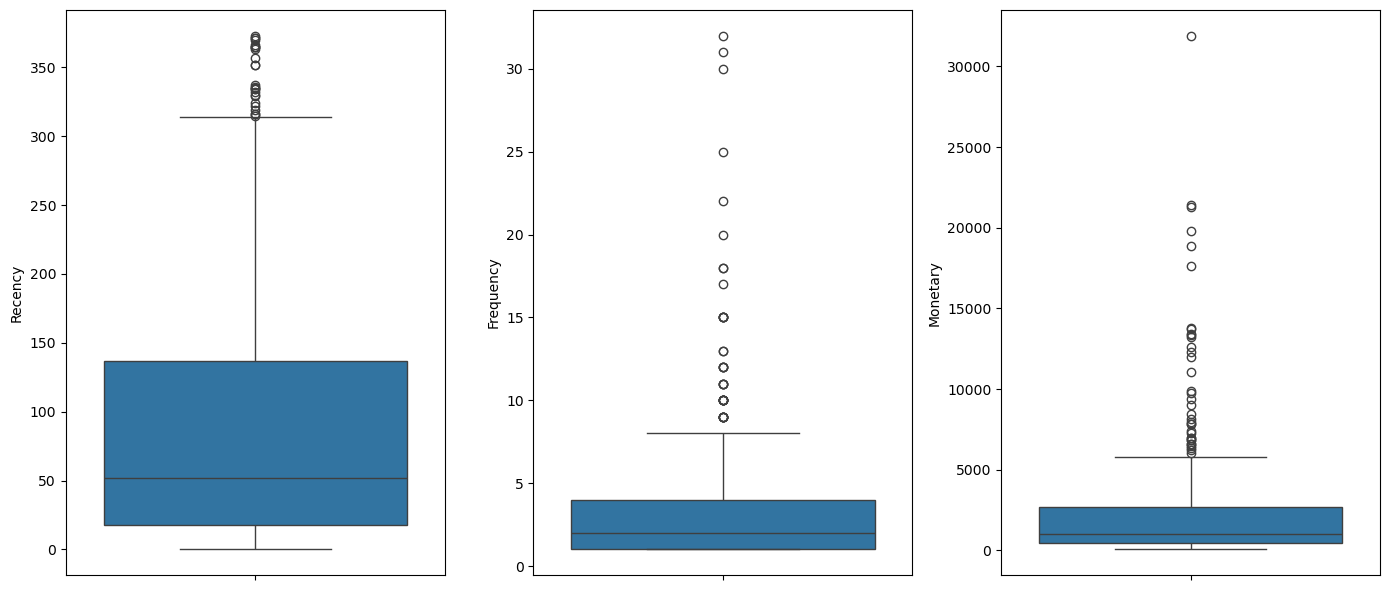

In [190]:
fig, axes = plt.subplots(1,3, figsize=(14,6))
for ax, val in zip([0,1,2],['Recency','Frequency','Monetary']):
    sns.boxplot(RFM_data[val], ax=axes[ax])
    plt.tight_layout()

Although there are outliers, we need to understand that there are very few customers who buy frequency and provide a greater monetary value to the copmany, therefore caution must be exercised while treating them as outliers. KMeans is sensitive to the outliers.

In [191]:
# Removing the outliers
# Here we remove the outliers tmporarily for our analysis, and will consider it when it is necessary again.
M_Q1 = RFM_data['Monetary'].quantile(0.25)
M_Q3 = RFM_data['Monetary'].quantile(0.75)

print(M_Q1,M_Q3)
M_IQR = M_Q3-M_Q1
monetary_outliers_data = RFM_data[(RFM_data['Monetary'] > (M_Q3 + (1.5*M_IQR)))]
monetary_outliers_data

459.65 2659.9624999999996


,Recency,Frequency,Monetary
CustomerID,,,
12357,32,1,6207.67
12359,57,4,6372.58
12409,78,3,11072.67
12428,25,9,7956.46
12431,35,15,6487.45
12433,0,7,13375.87
12435,79,2,7829.89
12451,10,5,9035.52
12471,1,30,19824.05


In [192]:
F_Q1 = RFM_data['Frequency'].quantile(0.25)
F_Q3 = RFM_data['Frequency'].quantile(0.75)
F_IQR = F_Q3-F_Q1
frequency_outliers_data = RFM_data[(RFM_data['Frequency'] > (F_Q3 + (1.5*F_IQR)))]
frequency_outliers_data

,Recency,Frequency,Monetary
CustomerID,,,
12362,2,10,5226.23
12395,18,12,3018.63
12417,2,9,3649.10
12428,25,9,7956.46
12431,35,15,6487.45
12437,1,18,4951.41
12471,1,30,19824.05
12474,16,18,7375.79
12476,15,11,6816.42


In [193]:
R_Q1 = RFM_data['Recency'].quantile(0.25)
R_Q3 = RFM_data['Recency'].quantile(0.75)
R_IQR = F_Q3-F_Q1
recency_outliers_data = RFM_data[(RFM_data['Recency'] > (R_Q3 + (1.5*R_IQR)))]
recency_outliers_data

,Recency,Frequency,Monetary
CustomerID,,,
12350,309,1,334.40
12353,203,1,89.00
12354,231,1,1079.40
12355,213,1,459.40
12361,286,1,189.90
...,...,...,...
16320,171,2,1038.46
17443,219,1,534.24
17444,147,3,2940.04


In [194]:
# RFM non outliers data
non_outlier_data = RFM_data[(~RFM_data.index.isin(monetary_outliers_data.index))&(~RFM_data.index.isin(frequency_outliers_data.index))&(~RFM_data.index.isin(recency_outliers_data.index))]
non_outlier_data

,Recency,Frequency,Monetary
CustomerID,,,
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12352,35,8,2506.04
12356,22,3,2811.43
...,...,...,...
15480,115,1,905.50
16321,71,5,373.65
17097,1,8,954.42


In [195]:
RFM_data.describe()

,Recency,Frequency,Monetary
count,414.000000,414.000000,414.000000
mean,95.405797,3.710145,2262.538913
std,104.638705,4.255524,3479.689136
min,0.000000,1.000000,51.560000
25%,18.000000,1.000000,459.650000
50%,52.000000,2.000000,1025.700000
75%,136.500000,4.000000,2659.962500
max,373.000000,32.000000,31906.820000


In [196]:
non_outlier_data.describe()

,Recency,Frequency,Monetary
count,257.000000,257.000000,257.000000
mean,46.474708,2.929961,1446.311868
std,37.247592,1.933200,1253.027196
min,0.000000,1.000000,51.560000
25%,16.000000,1.000000,530.180000
50%,36.000000,2.000000,1002.310000
75%,72.000000,4.000000,1970.600000
max,141.000000,8.000000,5568.350000


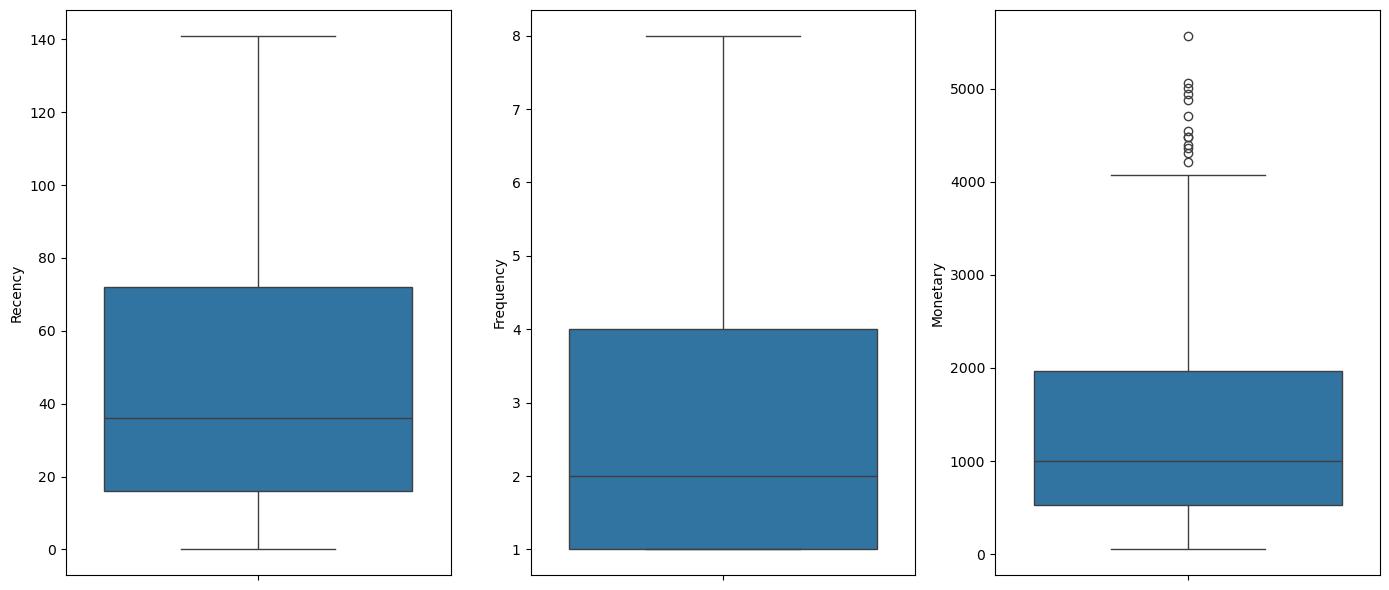

In [197]:
fig, axes = plt.subplots(1,3, figsize=(14,6))
for ax, val in zip([0,1,2],['Recency','Frequency','Monetary']):
    sns.boxplot(non_outlier_data[val], ax=axes[ax])
    plt.tight_layout()

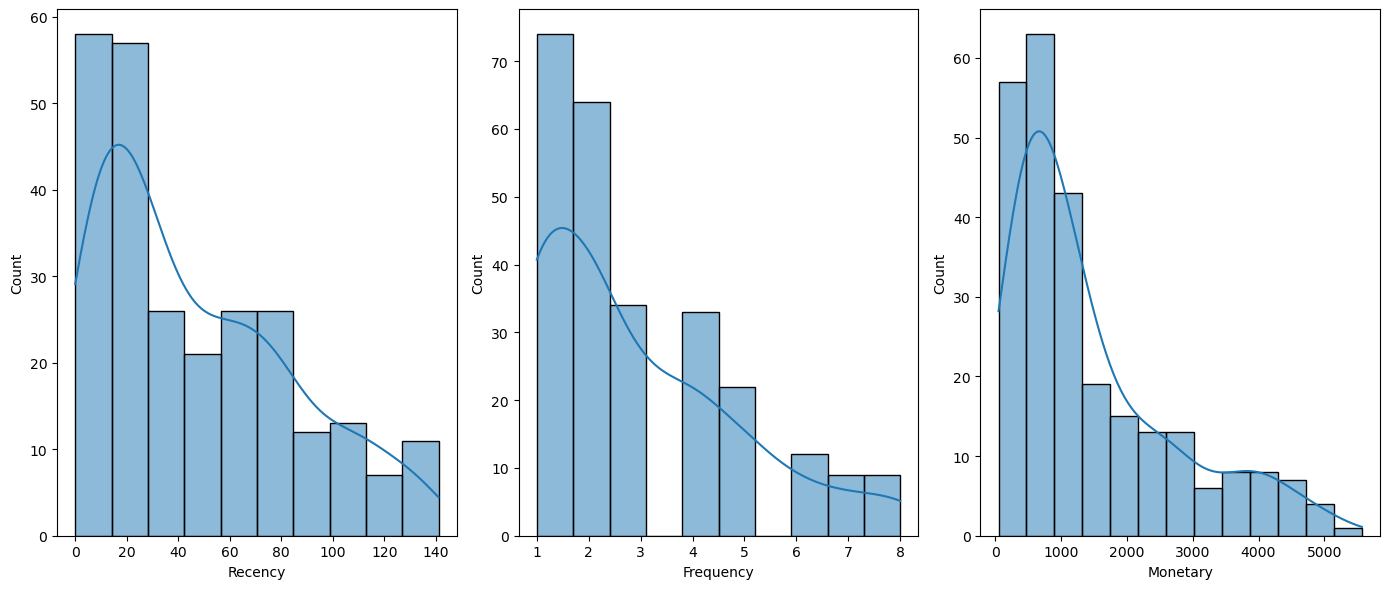

In [198]:
fig, axes = plt.subplots(1,3, figsize=(14,6))
for ax, val in zip([0,1,2],['Recency','Frequency','Monetary']):
    sns.histplot(non_outlier_data[val],kde=True, ax=axes[ax])
    plt.tight_layout()

In [199]:
print(RFM_data.isna().sum())

Recency      0
Frequency    0
Monetary     0
dtype: int64


In [200]:
print('-----------------------Skewness-----------------------')
print(RFM_data.skew())
print('-----------------------Kurtosis-----------------------')
print(RFM_data.kurt())

-----------------------Skewness-----------------------
Recency      1.235287
Frequency    3.261697
Monetary     3.881937
dtype: float64
-----------------------Kurtosis-----------------------
Recency       0.282715
Frequency    14.460086
Monetary     20.557056
dtype: float64


In [201]:
print('-----------------------Skewness-----------------------')
print(non_outlier_data.skew())
print('-----------------------Kurtosis-----------------------')
print(non_outlier_data.kurt())

-----------------------Skewness-----------------------
Recency      0.718722
Frequency    0.969453
Monetary     1.259887
dtype: float64
-----------------------Kurtosis-----------------------
Recency     -0.500368
Frequency    0.115116
Monetary     0.725743
dtype: float64


Text(0.5, 0.92, '3D Scatter Plot of RFM Data')

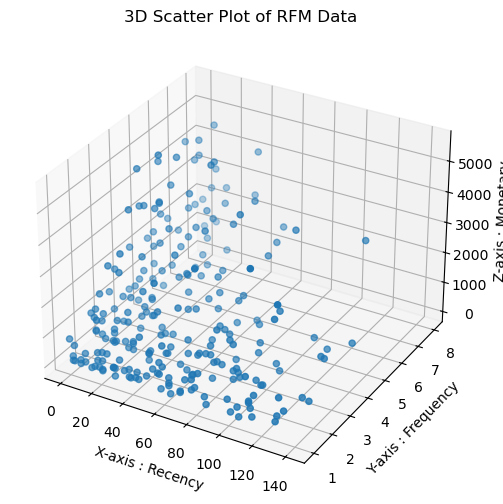

In [202]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Example: Creating a 3D scatter plot
ax.scatter(non_outlier_data['Recency'],non_outlier_data['Frequency'], non_outlier_data['Monetary'], cmap='viridis')
ax.set_xlabel('X-axis : Recency')
ax.set_ylabel('Y-axis : Frequency')
ax.set_zlabel('Z-axis : Monetary')
plt.title('3D Scatter Plot of RFM Data')

In [203]:
from sklearn.preprocessing import StandardScaler

In [204]:
non_outlier_data

,Recency,Frequency,Monetary
CustomerID,,,
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12352,35,8,2506.04
12356,22,3,2811.43
...,...,...,...
15480,115,1,905.50
16321,71,5,373.65
17097,1,8,954.42


In [221]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outlier_data)

In [222]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outlier_data.index,columns=['Recency','Frequency','Monetary'])
scaled_data_df

,Recency,Frequency,Monetary
CustomerID,,,
12347,-1.223259,2.109446,2.289875
12348,0.740424,0.554587,0.280611
12349,-0.765963,-1.000272,0.248874
12352,-0.308667,2.627732,0.847385
12356,-0.658364,0.036300,1.091582
...,...,...,...
15480,1.843314,-1.000272,-0.432446
16321,0.659724,1.072873,-0.857727
17097,-1.223259,2.627732,-0.393329


Text(0.5, 0.92, '3D Scatter Plot of RFM Data')

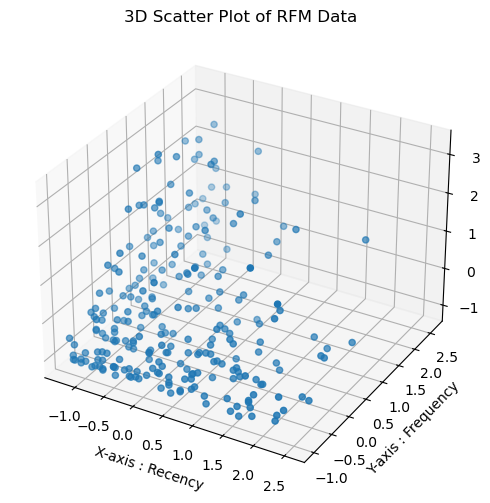

In [223]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Example: Creating a 3D scatter plot
ax.scatter(scaled_data_df['Recency'],scaled_data_df['Frequency'], scaled_data_df['Monetary'], cmap='viridis')
ax.set_xlabel('X-axis : Recency')
ax.set_ylabel('Y-axis : Frequency')
ax.set_zlabel('Z-axis : Monetary')
plt.title('3D Scatter Plot of RFM Data')

In [224]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [230]:
max_k = 12
inertia = []
silhouette_scores = []
k_values = [i for i in range(2,max_k + 1)]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123, init='k-means++',max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    
    inertia.append(kmeans.inertia_)


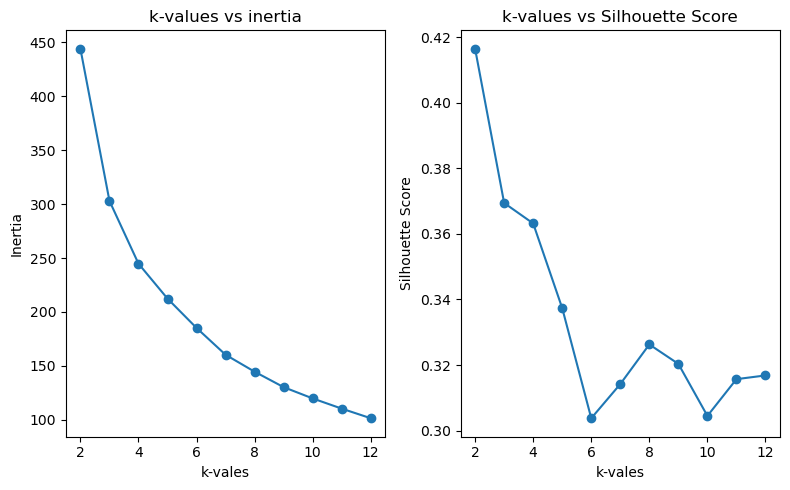

In [239]:

plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('k-vales')
plt.ylabel('Inertia')
plt.title('k-values vs inertia')

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('k-vales')
plt.ylabel('Silhouette Score')
plt.title('k-values vs Silhouette Score')
plt.tight_layout()

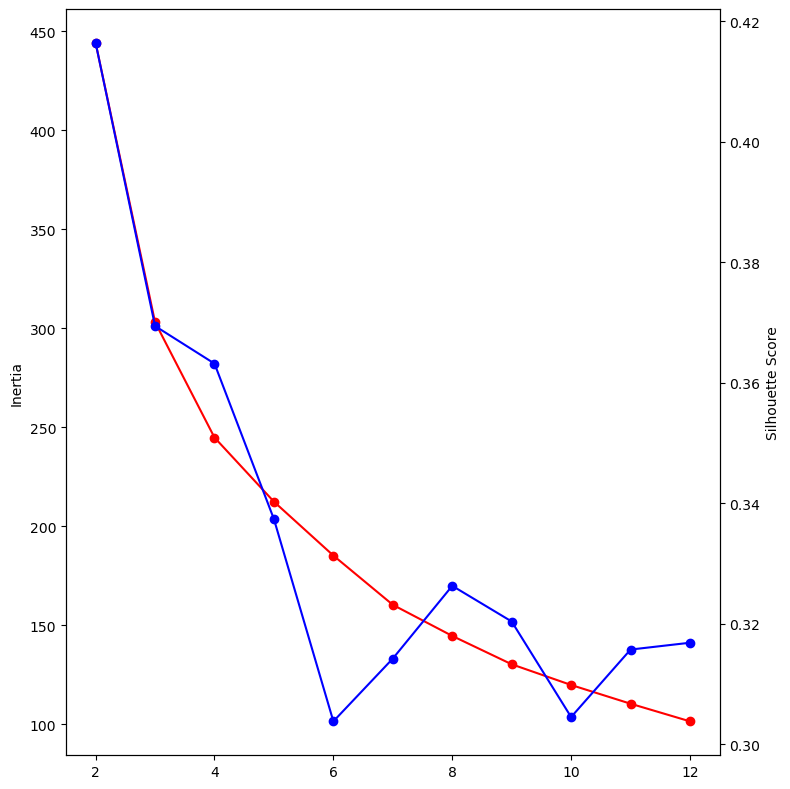

In [243]:


fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(k_values, inertia,'r', marker='o')
ax1.set_ylabel("Inertia")

ax2.plot(k_values, silhouette_scores,'b', marker='o');
ax2.set_ylabel("Silhouette Score")

plt.tight_layout()

In [244]:
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=100,max_iter=1000)
cluster_lables = kmeans.fit_predict(scaled_data_df)

In [247]:
cluster_lables

array([2, 3, 1, 0, 2, 1, 2, 3, 0, 1, 2, 1, 3, 1, 1, 3, 3, 2, 0, 1, 0, 3,
       1, 3, 3, 1, 1, 3, 1, 2, 0, 2, 3, 3, 3, 1, 0, 3, 0, 3, 1, 2, 1, 2,
       3, 3, 2, 1, 2, 1, 1, 1, 2, 1, 3, 2, 0, 2, 0, 3, 3, 1, 0, 0, 1, 2,
       1, 1, 1, 2, 0, 2, 1, 1, 1, 0, 3, 1, 2, 1, 3, 1, 3, 3, 3, 0, 0, 1,
       2, 1, 2, 1, 3, 0, 0, 1, 1, 3, 3, 1, 2, 1, 1, 3, 1, 3, 1, 1, 1, 0,
       2, 3, 1, 1, 0, 1, 2, 3, 1, 1, 1, 1, 1, 3, 3, 1, 2, 0, 0, 1, 1, 3,
       1, 3, 0, 1, 3, 2, 0, 3, 1, 1, 1, 3, 2, 1, 1, 1, 0, 3, 1, 1, 3, 1,
       2, 3, 0, 1, 3, 1, 0, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 3, 3, 0, 1, 2, 3, 1, 3, 0, 3, 1, 2, 3, 1, 3, 1, 0, 3, 0,
       0, 0, 2, 3, 3, 3, 1, 3, 3, 2, 3, 3, 1, 1, 3, 1, 0, 0, 2, 3, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 2, 2, 1, 1, 0, 3, 2, 1, 1, 1,
       3, 2, 1, 3, 1, 3, 0, 3, 1, 3, 3, 0, 0, 0, 3])

In [250]:
non_outlier_data['Clusters'] = cluster_lables

In [251]:
non_outlier_data

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12347,1,7,4310.00,2
12348,74,4,1797.24,3
12349,18,1,1757.55,1
12352,35,8,2506.04,0
12356,22,3,2811.43,2
...,...,...,...,...
15480,115,1,905.50,3
16321,71,5,373.65,0
17097,1,8,954.42,0


In [257]:
cluster_colors = {
    0:'red',
    1:'blue',
    2:'green',
    3:'pink'
}
colors = non_outlier_data['Clusters'].map(cluster_colors)

Text(0.5, 0.92, '3D Scatter Plot of RFM Data')

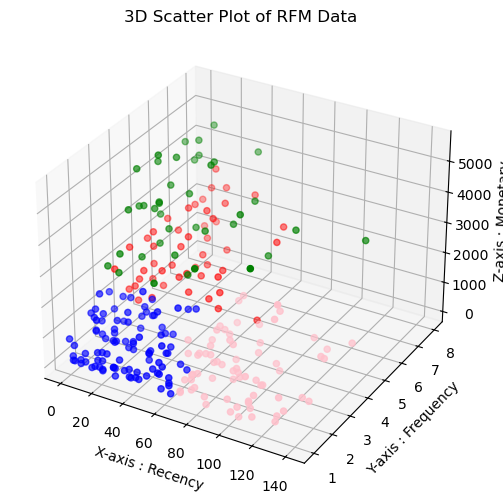

In [258]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Example: Creating a 3D scatter plot
ax.scatter(non_outlier_data['Recency'],non_outlier_data['Frequency'], non_outlier_data['Monetary'], c=colors)
ax.set_xlabel('X-axis : Recency')
ax.set_ylabel('Y-axis : Frequency')
ax.set_zlabel('Z-axis : Monetary')
plt.title('3D Scatter Plot of RFM Data')